In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [1]:
from model import QNetwork

env = 'bandit'
conflict = False

# name
name = '{}_conflict={}'.format(env, conflict)
filepath = name + '.pth'

model = QNetwork()
model.load_state_dict(torch.load(filepath))
model.eval()  # Set the model to evaluation mode


from env import BanditEnv


env = BanditEnv(conflict=conflict)

NameError: name 'torch' is not defined

In [26]:
# Generate all possible 9-dimensional inputs
def get_all_inputs():
    """Generate all possible 9-dimensional states."""
    all_states = []
    for state in [0, 1]:  # Two possible states
        for i in range(4):  # Four possible one-hot vectors for obj1
            for j in range(4):  # Four possible one-hot vectors for obj2
                obj1 = np.eye(4)[i]  # One-hot encoding for obj1
                obj2 = np.eye(4)[j]  # One-hot encoding for obj2
                obs = np.concatenate([[state], obj1, obj2])  # Combine into 9-dim input
                all_states.append(obs)
    return np.array(all_states)



inputs = get_all_inputs()
inputs.shape

(32, 9)

In [21]:
inputs

array([[0., 1., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 1.],
       [1., 1., 0., 0., 0., 1., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 1., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0., 1., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 1., 0., 0., 1., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0., 1., 0., 0.],
       [1.

In [27]:
r = model.encode(torch.tensor(inputs, dtype=torch.float32))
y = model.decode(r)

r = r.data.cpu().numpy()
y = y.data.cpu().numpy()

r.shape, y.shape

((32, 64), (32, 2))

In [28]:
actions = y.argmax(-1)

In [29]:
rewards = []

for i in range(len(inputs)):
    action = actions[i]
    rewards.append(env.get_reward(state=inputs[i][0], obj1=inputs[i][1:5], obj2=inputs[i][5:9])[action])

rewards = np.array(rewards)

In [8]:
inputs.shape

(32, 9)

In [30]:
rewards

array([1., 2., 3., 4., 2., 2., 3., 4., 3., 3., 3., 4., 4., 4., 4., 4., 1.,
       2., 3., 4., 2., 2., 3., 4., 3., 3., 3., 4., 4., 4., 4., 4.])

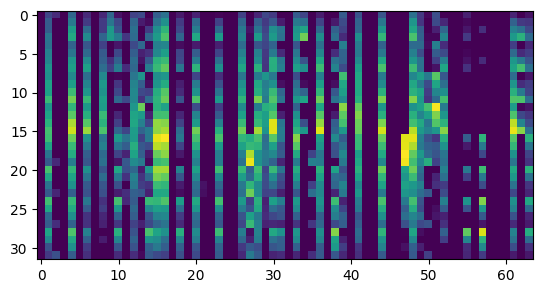

In [10]:
plt.imshow(r)

In [11]:
frs = []

for i in [1.0, 2.0, 3.0, 4.0]:
    idx = (rewards == i)
    fr = np.mean(r[idx], 0)
    frs.append(fr)

frs = np.stack(frs, axis=0)
frs.shape

(4, 64)

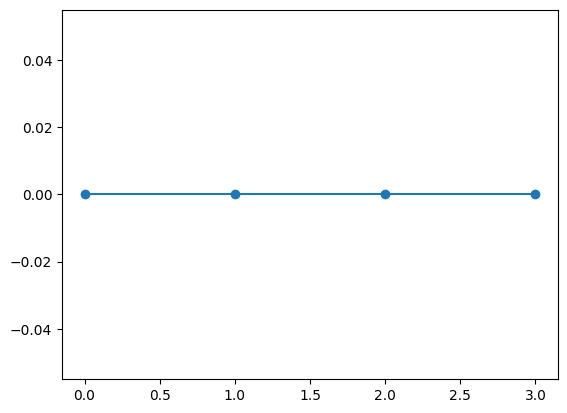

In [12]:
plt.plot(frs[:, -5], 'o-')

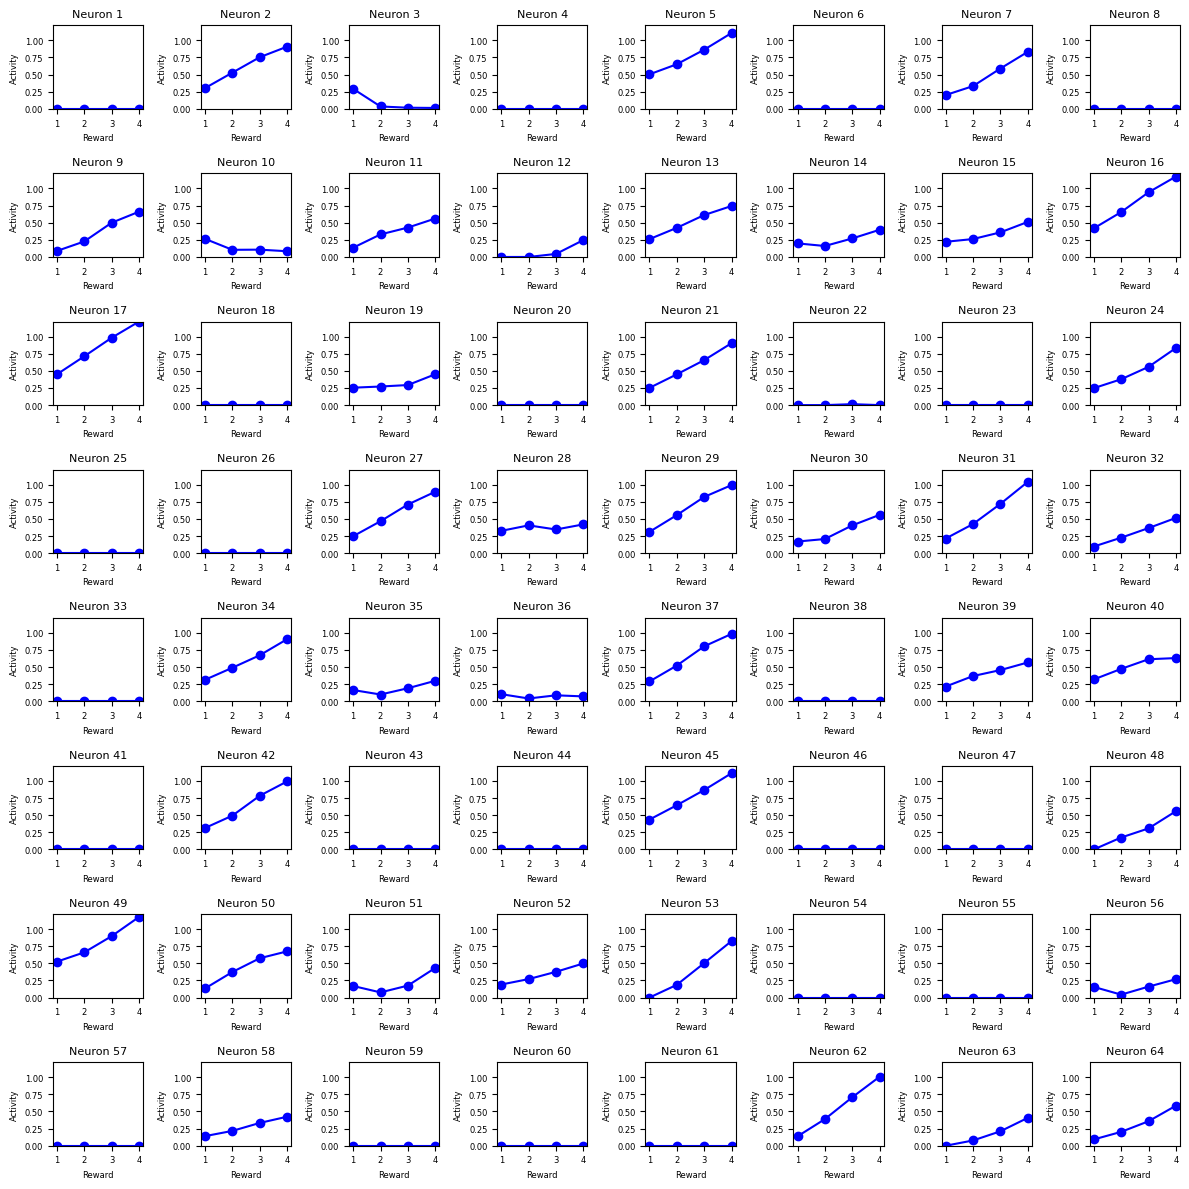

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Example data (replace this with your actual data)
# Shape: (64, 4) -> 64 neurons, each with a 4-dimensional response
neuron_activity = frs.T

# X-axis values corresponding to rewards (1, 2, 3, 4)
x_values = [1, 2, 3, 4]

# Create 64 subplots in an 8x8 grid
fig, axes = plt.subplots(8, 8, figsize=(12, 12))

for i, ax in enumerate(axes.flat):
    ax.plot(x_values, neuron_activity[i], marker='o', linestyle='-', color='b')  # Line plot
    ax.set_xticks(x_values)
    ax.set_ylim(0, np.max(neuron_activity))  # Normalize y-axis
    ax.set_title(f"Neuron {i+1}", fontsize=8)
    ax.set_xlabel("Reward", fontsize=6)
    ax.set_ylabel("Activity", fontsize=6)
    ax.tick_params(axis='both', which='major', labelsize=6)

# Adjust layout for better spacing
plt.tight_layout()
plt.savefig('{}.pdf'.format(name), dpi=300, bbox_inches='tight')

(-0.5, 63.5, 3.5, -0.5)

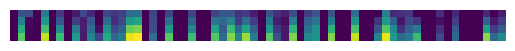

In [63]:
plt.imshow(frs)
plt.axis('off')

In [22]:
idx_state1 = inputs[:, 0] == 0

r[idx_state1, :].shape

(256, 64)

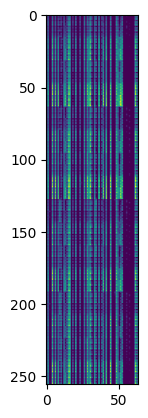

In [24]:
plt.imshow(r[idx_state1, :])